In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv(r'C:\Users\prana\Documents\data science\real_estate_price_size_year.csv')
df

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009
...,...,...,...
95,252460.400,549.80,2009
96,310522.592,1037.44,2009
97,383635.568,1504.75,2006
98,225145.248,648.29,2015


In [3]:
df.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


## train test split

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
y = df['price']
x = df[['size', 'year']]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

## Training the Model

In [7]:
reg = LinearRegression()

In [8]:
reg.fit(x_train, y_train)

LinearRegression()

In [9]:
reg.coef_

array([ 211.03088794, 3022.55124605])

In [10]:
reg.intercept_

-5969718.532044748

In [11]:
pred = reg.predict(x_test)

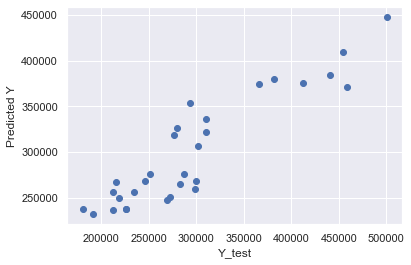

In [12]:
plt.scatter(y_test, pred)
plt.xlabel('Y_test')
plt.ylabel('Predicted Y')
plt.show()

## we can see that the model is not the best

In [13]:
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [14]:
lm.intercept_

-5772267.01746328

In [15]:
lm.coef_

array([ 227.70085401, 2916.78532684])

In [16]:
lm.score(x,y)

0.7764803683276796

Adjusted R^sq

In [17]:
def adj_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [18]:
adj_r2(x,y)

0.7672574638369029

In [19]:
from sklearn.feature_selection import f_regression

In [20]:
f_regression(x,y)

(array([285.92105192,   0.85525799]), array([8.12763222e-31, 3.57340758e-01]))

        F-statistic                  ,           p-value

In [21]:
p_values = f_regression(x,y)[1]
p_values

array([8.12763222e-31, 3.57340758e-01])

In [22]:
p_values.round(3)

array([0.   , 0.357])

## Summary

In [23]:
lm_summary = pd.DataFrame(data = x.columns.values, columns=['Features'])
lm_summary ['Coefficients'] = reg.coef_
lm_summary ['p-values'] = p_values.round(3)
lm_summary

,Features,Coefficients,p-values
0,size,211.030888,0.000
1,year,3022.551246,0.357


It seems that 'Year' is not significant, therefore we should remove it from the model.